## Echocardiogram dataset used to predict if patient will survive one year after heart attack

In [1]:
#import required libraries
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#convert csv file into pandas dataframe
echodata = pd.read_csv('/home/ponni/datascience/datasets-master/Echocardiogram/echocardiogram.data',usecols = range(0,13), header = None)

In [3]:
#name columns as given in the dataset
echodata = echodata.rename(columns={0:'Survival', 1:'Still-alive', 2:'Age-at-heart-attack',
                           3:'Pericardial-effusion',4:'Fractional-shortening',5:'Epss',
                           6:'Lvdd',7:'wall-motion-score',8:'wall-motion-index',9:'Mult',
                           10:'Name', 11:'Group', 12:'Alive-at-1'})

In [115]:
# get datypes
echodata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 13 columns):
Survival                 131 non-null object
Still-alive              132 non-null object
Age-at-heart-attack      132 non-null object
Pericardial-effusion     132 non-null int64
Fractional-shortening    132 non-null object
Epss                     132 non-null object
Lvdd                     132 non-null object
wall-motion-score        132 non-null object
wall-motion-index        132 non-null object
Mult                     132 non-null object
Name                     132 non-null object
Group                    132 non-null object
Alive-at-1               132 non-null object
dtypes: int64(1), object(12)
memory usage: 13.5+ KB


In [4]:
#examine first 10 rows
echodata.iloc[0:10,]

,Survival,Still-alive,Age-at-heart-attack,Pericardial-effusion,Fractional-shortening,Epss,Lvdd,wall-motion-score,wall-motion-index,Mult,Name,Group,Alive-at-1
0,11,0,71,0,0.260,9,4.600,14,1,1,name,1,0
1,19,0,72,0,0.380,6,4.100,14,1.700,0.588,name,1,0
2,16,0,55,0,0.260,4,3.420,14,1,1,name,1,0
3,57,0,60,0,0.253,12.062,4.603,16,1.450,0.788,name,1,0
4,19,1,57,0,0.160,22,5.750,18,2.250,0.571,name,1,0
5,26,0,68,0,0.260,5,4.310,12,1,0.857,name,1,0
6,13,0,62,0,0.230,31,5.430,22.5,1.875,0.857,name,1,0
7,50,0,60,0,0.330,8,5.250,14,1,1,name,1,0
8,19,0,46,0,0.340,0,5.090,16,1.140,1.003,name,1,0
9,25,0,54,0,0.140,13,4.490,15.5,1.190,0.930,name,1,0


In [5]:
#examine the last few rows
echodata.iloc[110:130,]

,Survival,Still-alive,Age-at-heart-attack,Pericardial-effusion,Fractional-shortening,Epss,Lvdd,wall-motion-score,wall-motion-index,Mult,Name,Group,Alive-at-1
110,27,0,62,0,0.22,12.1,3.92,11,1,0.785,name,?,?
111,13,0,66,0,0.24,13.6,4.38,22,2.20,0.714,name,?,?
112,36,0,61,0,0.27,9.00,4.06,12,1,0.857,name,?,?
113,25,0,59,1,0.40,9.20,5.36,12,1,0.857,name,?,?
114,27,0,57,0,0.29,9.40,4.77,9,1,0.64,name,?,?
115,34,0,62,1,0.19,28.9,6.63,19.5,1.95,0.714,name,?,?
116,37,0,?,0,0.26,0,4.38,9,1,0.64,name,?,?
117,34,0,54,0,0.43,9.30,4.79,10,1,0.714,name,?,?
118,28,1,62,1,0.24,28.6,5.86,21.5,1.95,0.786,name,?,?
119,28,0,?,0,0.23,19.1,5.49,12,1.20,0.71,name,?,?


In [6]:
import re
#import seaborn to visualize data
import seaborn as sns

#### From the data description, the columns, Mult, Group, and 'Name' are not useful in data analysis. So these columns will be dropped.

In [7]:
echodata2 = echodata.drop(['Mult','Group','Name'],axis = 1)

#### replace '?' values by a dummy float 10 to be able to manipulate the data more easily in the following sections

In [9]:
echodata2 = echodata2.replace(to_replace = '?', value = float(10))

In [10]:
echodata2.iloc[120:130,]

,Survival,Still-alive,Age-at-heart-attack,Pericardial-effusion,Fractional-shortening,Epss,Lvdd,wall-motion-score,wall-motion-index,Alive-at-1
120,17,0,64,0,0.15,6.60,4.17,14,1.27,10
121,38,0,57,1,0.12,0,2.32,16.5,1.375,10
122,31,0,61,0,0.18,0,4.48,11,1.375,10
123,12,0,61,1,0.19,13.2,5.04,19,1.73,10
124,36,0,48,0,0.15,12,3.66,10,1,10
125,17,0,10,0,0.09,6.80,4.96,13,1.08,10
126,21,0,61,0,0.14,25.5,5.16,14,1.27,10
127,7.5,1,64,0,0.24,12.9,4.72,12,1,10
128,41,0,64,0,0.28,5.40,5.47,11,1.10,10
129,36,0,69,0,0.20,7.00,5.05,14.5,1.21,10


In [11]:
print(echodata2.columns.values)

['Survival' 'Still-alive' 'Age-at-heart-attack' 'Pericardial-effusion'
 'Fractional-shortening' 'Epss' 'Lvdd' 'wall-motion-score'
 'wall-motion-index' 'Alive-at-1']


In [18]:
echodata2 = echodata2.astype(float)

In [ ]:
pd.set_option('mode.chained_assignment', None)

### Impute correct values for 'Alive-at-1'

In [52]:
data2 = echodata2.loc[(echodata2['Survival']>= 12) & (echodata2['Still-alive']== 1)]
data2['Alive-at-1'] = 1
data3 = echodata2.loc[(echodata2['Survival']<12) & (echodata2['Still-alive']== 0)]
data3['Alive-at-1'] = 0
data4 = echodata2.loc[(echodata2['Survival']<12) & (echodata2['Still-alive']== 1)]
data4['Alive-at-1'] = 0
data5 = echodata2.loc[(echodata2['Survival']>= 12) & (echodata2['Still-alive']== 0)]
data5['Alive-at-1'] = 0

In [53]:
print(data2.shape,data3.shape,data4.shape,data5.shape)

(8, 10) (4, 10) (35, 10) (84, 10)


In [54]:
#ignore data4 since it is less than 12 months and still-alive =1 according to data description
echo_corr = pd.concat([data2,data3,data5])

In [55]:
echo_corr.shape

(96, 10)

In [57]:
echo_corr = echo_corr.drop(['Survival', 'Still-alive'], axis = 1)

In [58]:
echo_corr.isna().sum()

Age-at-heart-attack      0
Pericardial-effusion     0
Fractional-shortening    0
Epss                     0
Lvdd                     0
wall-motion-score        0
wall-motion-index        0
Alive-at-1               0
dtype: int64

In [60]:
echo_corr.iloc[86:96,]

,Age-at-heart-attack,Pericardial-effusion,Fractional-shortening,Epss,Lvdd,wall-motion-score,wall-motion-index,Alive-at-1
121,57.0,1.0,0.12,0.0,2.32,16.5,1.375,0
122,61.0,0.0,0.18,0.0,4.48,11.0,1.375,0
123,61.0,1.0,0.19,13.2,5.04,19.0,1.730,0
124,48.0,0.0,0.15,12.0,3.66,10.0,1.000,0
125,10.0,0.0,0.09,6.8,4.96,13.0,1.080,0
126,61.0,0.0,0.14,25.5,5.16,14.0,1.270,0
128,64.0,0.0,0.28,5.4,5.47,11.0,1.100,0
129,69.0,0.0,0.20,7.0,5.05,14.5,1.210,0
130,57.0,0.0,0.14,16.1,4.36,15.0,1.360,0
131,62.0,0.0,0.15,0.0,4.51,15.5,1.409,0


In [63]:
from __future__ import absolute_import, division, print_function

import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)


1.13.1


In [64]:
#create train and test datasets
train_echo = echo_corr.sample(frac=0.8,random_state=0)
test_echo = echo_corr.drop(train_echo.index)


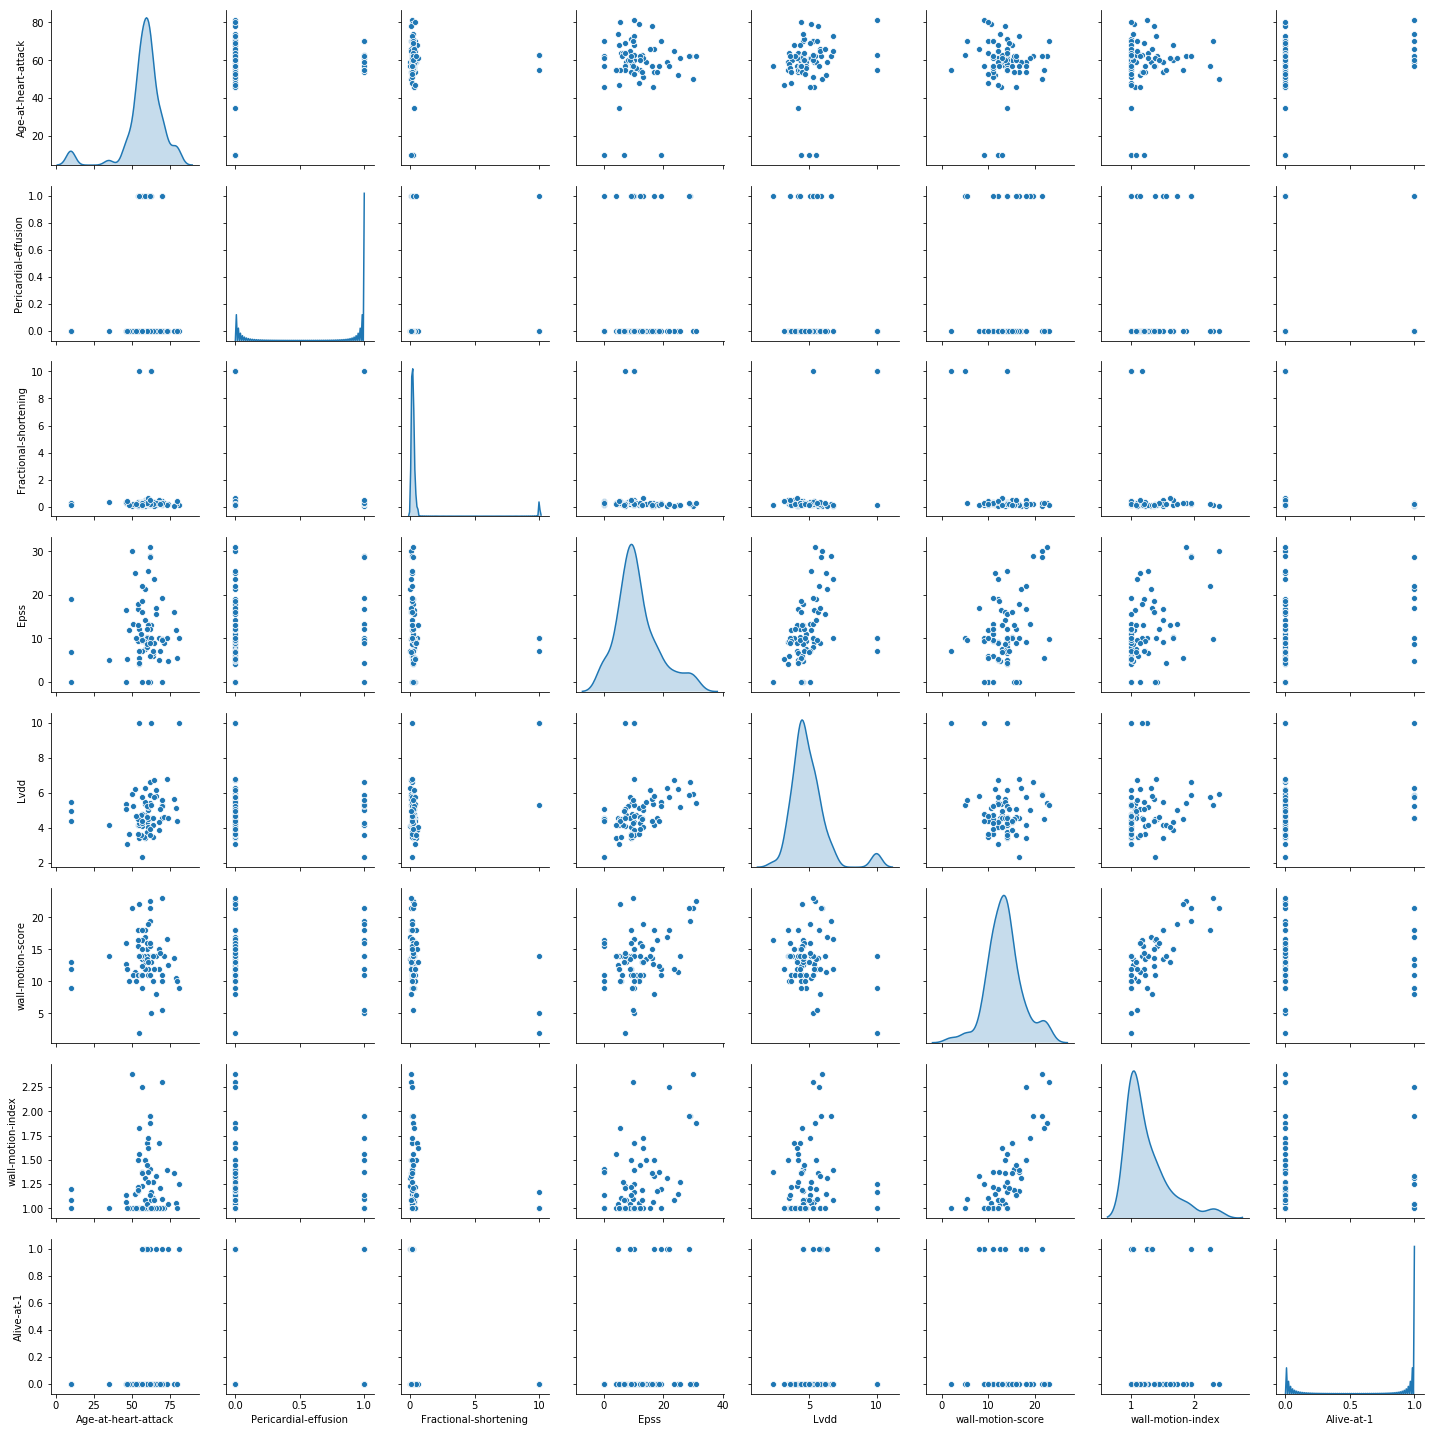

In [65]:
sns.pairplot(train_echo, diag_kind="kde")


In [66]:
#get statistics
train_stats = train_echo.describe()
train_stats.pop("Alive-at-1")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Age-at-heart-attack,77.0,58.649351,12.673809,10.00,55.00,60.000,64.000,81.00
Pericardial-effusion,77.0,0.155844,0.365086,0.00,0.00,0.000,0.000,1.00
Fractional-shortening,77.0,0.604753,1.907412,0.03,0.15,0.217,0.290,10.00
Epss,77.0,11.403182,7.140411,0.00,7.00,10.000,14.300,31.00
Lvdd,77.0,4.933143,1.345077,2.32,4.17,4.580,5.360,10.00
wall-motion-score,77.0,13.497922,3.770357,2.00,11.00,13.500,15.000,23.00
wall-motion-index,77.0,1.251831,0.333827,1.00,1.00,1.110,1.375,2.39


In [67]:
#get y values
train_y = train_echo.pop('Alive-at-1')
test_y = test_echo.pop('Alive-at-1')


In [69]:
#normalize values
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_echo)
normed_test_data = norm(test_echo)


In [94]:
#build model
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(512, activation=tf.nn.relu, input_shape = [len(train_echo.keys())]),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [95]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



In [96]:
model.fit(train_echo,train_y, epochs=5)

Epoch 1/5
77/77 [==============================] - 1s 9ms/sample - loss: 4.3208 - acc: 0.0519
Epoch 2/5
77/77 [==============================] - 0s 245us/sample - loss: 0.5269 - acc: 0.8961
Epoch 3/5
77/77 [==============================] - 0s 275us/sample - loss: 0.8519 - acc: 0.8961
Epoch 4/5
77/77 [==============================] - 0s 291us/sample - loss: 0.9909 - acc: 0.8961
Epoch 5/5
77/77 [==============================] - 0s 267us/sample - loss: 0.9093 - acc: 0.8961


In [97]:
#evaluate model
test_loss, test_acc = model.evaluate(test_echo, test_y)

print('Test accuracy:', test_acc)


19/19 [==============================] - 0s 14ms/sample - loss: 0.0014 - acc: 1.0000
Test accuracy: 1.0


In [98]:
predictions = model.predict(test_echo)


In [99]:
predictions.shape

(19, 10)

In [100]:
predictions[0]

array([9.9936765e-01, 6.3229323e-04, 2.5100632e-11, 1.8038784e-09,
       1.6539813e-07, 2.1980014e-08, 3.4127030e-09, 1.8428843e-09,
       4.2605648e-09, 3.6218721e-09], dtype=float32)

In [111]:
pred_y = [np.argmax(i) for i in predictions]

In [112]:
pred_y

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [113]:
test_y

52     0
1      0
12     0
25     0
41     0
42     0
45     0
59     0
62     0
64     0
79     0
91     0
92     0
95     0
101    0
103    0
111    0
117    0
128    0
Name: Alive-at-1, dtype: int64

### The sequential neural network model used gives 100% accuracy. It is likely that the training and test data are similar. 